<h1>Classification - Nave Bayes & Logistic Regression<h1>

</h6>By Navneeth Krishnan 
           </h6>

https://github.com/navneeth-k/Machine_Learning

<blockquote>Implementing the Nave Bayes and Logistic Regression algorithms and hence comparing the accuracies of Classfication for both the Classifiers </blockquote>

<h3>1. Exploratory Data Analysis and Train Test Split</h3>

In [243]:
import pandas as pd#Importing required packages 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt       
%matplotlib inline
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [244]:
#Loading the Data into the Notebook
df = pd.read_csv('liver_disease_1.csv')
df

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,Yes
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,Yes
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,Yes
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,Yes
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,Yes
5,46,1.8,0.7,208,19,14,7.6,4.4,1.30,Yes
6,26,0.9,0.2,154,16,12,7.0,3.5,1.00,Yes
7,29,0.9,0.3,202,14,11,6.7,3.6,1.10,Yes
8,17,0.9,0.3,202,22,19,7.4,4.1,1.20,No
9,55,0.7,0.2,290,53,58,6.8,3.4,1.00,Yes


In [245]:
#Checking the shape of the Data
df.shape

(583, 10)

In [246]:
#Examining the Column names of the Data
df.columns

Index(['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [247]:
#Examining the datatypes of the data 
df.dtypes

Age                             int64
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                        object
dtype: object

<blockquote>Examining the Mean, Max and Min values present in the Dataset</blockquote>

In [248]:
#Getting statistical information about the columns in the dataset
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000


<blockquote>Check for Nulls and Duplicates</blockquote>

In [249]:
df.isnull().sum()

Age                           0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [250]:
df_copy = df

In [251]:
agr_mean = df_copy['Albumin_and_Globulin_Ratio'].mean()
print(agr_mean)

0.9470639032815197


In [252]:
df_copy['Albumin_and_Globulin_Ratio'] = df['Albumin_and_Globulin_Ratio'].replace(np.nan,agr_mean)
df_copy['Albumin_and_Globulin_Ratio']

0      0.900000
1      0.740000
2      0.890000
3      1.000000
4      0.400000
5      1.300000
6      1.000000
7      1.100000
8      1.200000
9      1.000000
10     0.800000
11     0.600000
12     0.900000
13     1.000000
14     0.870000
15     0.700000
16     1.300000
17     0.920000
18     0.800000
19     0.800000
20     0.550000
21     0.500000
22     0.900000
23     0.600000
24     1.850000
25     1.100000
26     1.100000
27     1.200000
28     0.950000
29     1.100000
30     0.400000
31     1.400000
32     1.200000
33     0.800000
34     0.800000
35     0.900000
36     1.180000
37     0.800000
38     0.610000
39     1.100000
40     1.000000
41     1.100000
42     0.600000
43     1.000000
44     1.000000
45     0.900000
46     1.340000
47     1.300000
48     1.000000
49     0.400000
50     0.700000
51     1.000000
52     1.300000
53     1.200000
54     0.500000
55     0.500000
56     1.000000
57     0.900000
58     0.600000
59     1.390000
60     1.000000
61     1.000000
62     1

In [253]:
df.isnull().sum()

Age                           0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [254]:
df_copy['Dataset'] = df['Dataset'].replace('No',0) 
df_copy['Dataset'] = df['Dataset'].replace('Yes',1)
df_copy

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0.7,0.1,187,16,18,6.8,3.3,0.900000,1
1,62,10.9,5.5,699,64,100,7.5,3.2,0.740000,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.890000,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.000000,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.400000,1
5,46,1.8,0.7,208,19,14,7.6,4.4,1.300000,1
6,26,0.9,0.2,154,16,12,7.0,3.5,1.000000,1
7,29,0.9,0.3,202,14,11,6.7,3.6,1.100000,1
8,17,0.9,0.3,202,22,19,7.4,4.1,1.200000,0
9,55,0.7,0.2,290,53,58,6.8,3.4,1.000000,1


,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216089,0.137351
Total_Bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206159,0.220208
Direct_Bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200004,0.246046
Alkaline_Phosphotase,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.233960,0.184866
Alamine_Aminotransferase,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002374,0.163416
Aspartate_Aminotransferase,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070024,0.151934
Total_Protiens,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.233904,-0.035008
Albumin,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.686322,-0.161388
Albumin_and_Globulin_Ratio,-0.216089,-0.206159,-0.200004,-0.233960,-0.002374,-0.070024,0.233904,0.686322,1.000000,-0.162319
Dataset,0.137351,0.220208,0.246046,0.184866,0.163416,0.151934,-0.035008,-0.161388,-0.162319,1.000000


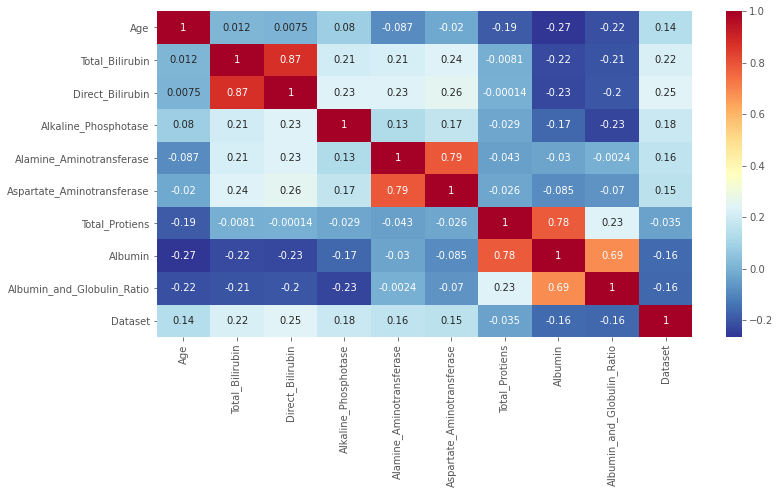

In [255]:
#Heatmap, describing various inter-dependancies between the Features 
#Also, performing a Correlation between the Features
plt.figure(figsize=(12,6))
c= df_copy.corr()
sns.heatmap(c,cmap='RdYlBu_r',annot=True)
c

In [256]:
#Splitting the data in Training and Testing samples
#Importing Train-Test Split
from sklearn.model_selection import train_test_split

In [257]:
#Splitting the Features and Outcomes
#X represents the Features and Y represents the Outcomes
X = df_copy.drop(columns=['Dataset'],axis=1)
Y = df_copy['Dataset']

In [258]:
#Splitting the data into Training and Testing Data 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=42,stratify=Y)

<h3>2. Implementing Naive Bayes Classifier</h3>

<h4>a) Implementing Multinomial Model</h4>

In [259]:
#Import Lib for the Multinomial Model
from sklearn.naive_bayes import MultinomialNB

In [260]:
#Creating an Object for the Model Classifier
MultNB = MultinomialNB()

#Training the model using the Training Dataset
MultNB.fit(X_train,Y_train)

MultinomialNB()

In [261]:
#Make the Predictions on the Test Data 
Y_predNB = MultNB.predict(X_test)

In [262]:
#Importing Confusion Matrix for Accuracy measures
from sklearn.metrics import confusion_matrix

In [263]:
#Evaluate the Multinomial Model predictions
confm=confusion_matrix(Y_test,Y_predNB)
confm

array([[43,  7],
       [73, 52]], dtype=int64)

In [264]:
tn, fp, fn, tp = confusion_matrix(Y_test,Y_predNB).ravel()
print("True Negatives:",tn)
print("False Positives:",fp)
print("False Negatives:",fn)
print("True Positives:",tp)

True Negatives: 43
False Positives: 7
False Negatives: 73
True Positives: 52


In [265]:
#Calculating the Accuracy of the Model 
from sklearn.metrics import accuracy_score
acr_mult = accuracy_score(Y_test,Y_predNB)*100
print('Multinomial Accuracy : ',acr_mult)

Multinomial Accuracy :  54.285714285714285


<h4>b) Implementing Bernouli Model</h4>

In [266]:
#Import Lib for the Bernouli Model 
from sklearn.naive_bayes import BernoulliNB

In [267]:
#Creating an Object for the Model Classifier
BernNB = BernoulliNB()

#Training the model using the Training Dataset 
BernNB.fit(X_train,Y_train)

BernoulliNB()

In [268]:
#Make the Prediction on the Test Data 
Y_predB = BernNB.predict(X_test)

In [269]:
confmB = confusion_matrix(Y_test,Y_predB)
confmB

array([[  0,  50],
       [  0, 125]], dtype=int64)

In [270]:
tn, fp, fn, tp = confusion_matrix(Y_test,Y_predB).ravel()
print("True Negatives:",tn)
print("False Positives:",fp)
print("False Negatives:",fn)
print("True Positives:",tp)

True Negatives: 0
False Positives: 50
False Negatives: 0
True Positives: 125


In [271]:
acr_bern = accuracy_score(Y_test,Y_predB)*100
print('Bernouli Accuracy : ',acr_bern)

Bernouli Accuracy :  71.42857142857143


<h4>c) Implementing Gaussian Model</h4>

In [272]:
#Import Lib for the Gaussian Model
from sklearn.naive_bayes import GaussianNB

In [273]:
#Creating an Object for the Model Classifier
GausNB = GaussianNB()

#Training the model using the Training Dataset 
GausNB.fit(X_train,Y_train)

GaussianNB()

In [274]:
#Make the Prediction on the Test Data 
Y_predG = GausNB.predict(X_test)

In [275]:
confmG = confusion_matrix(Y_test,Y_predG)
confmG

array([[49,  1],
       [70, 55]], dtype=int64)

In [276]:
tn, fp, fn, tp = confusion_matrix(Y_test,Y_predG).ravel()
print("True Negatives:",tn)
print("False Positives:",fp)
print("False Negatives:",fn)
print("True Positives:",tp)

True Negatives: 49
False Positives: 1
False Negatives: 70
True Positives: 55


In [277]:
acr_gaus = accuracy_score(Y_test,Y_predG)*100
print('Bernouli Accuracy : ',acr_gaus)

Bernouli Accuracy :  59.42857142857143


<h3>3. Implementing Logistic Regression</h3>

In [278]:
#Import Lin for the Logistic Regression Model 
from sklearn.linear_model import LogisticRegression

In [279]:
#Creating an Object for the Model Classifier
lrModel = LogisticRegression()

#Training the model using the Training Dataset 
lrModel.fit(X_train,Y_train)

c:\users\navneeth k\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [280]:
#Make the Prediction on the Test Data 
Y_predLR = lrModel.predict(X_test)

In [281]:
acr_lr = accuracy_score(Y_test,Y_predLR)*100
print('Logistic Regression Score : ',acr_lr)

Logistic Regression Score :  73.71428571428571


In [282]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_predLR))

              precision    recall  f1-score   support

           0       0.60      0.24      0.34        50
           1       0.75      0.94      0.84       125

    accuracy                           0.74       175
   macro avg       0.68      0.59      0.59       175
weighted avg       0.71      0.74      0.69       175



In [283]:
pd.crosstab(Y_test,Y_predLR,rownames=['True'],colnames=['Predicted'],margins=True)

Predicted,0,1,All
True,,,
0,12,38,50
1,8,117,125
All,20,155,175


In [284]:
tn, fp, fn, tp = confusion_matrix(Y_test,Y_predLR).ravel()
print("True Negatives:",tn)
print("False Positives:",fp)
print("False Negatives:",fn)
print("True Positives:",tp)

True Negatives: 12
False Positives: 38
False Negatives: 8
True Positives: 117


<h5>Implementing Grid Search CV for Improving Accuracy</h5>

In [285]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
c_values = list(np.arange(1,100))
param_grid = [
    {
        'C':c_values,
        'penalty':['l1'],
        'solver':['liblinear'],
        'multi_class':['ovr'],
        'random_state':[42]
    },
    {
        'C':c_values,
        'penalty':['l2'],
        'solver':['liblinear','newton-cg','lbfgs'],
        'multi_class':['ovr'],
        'random_state':[42]
    }
]
strat_k_fold = KFold(3,True,1)
grid = GridSearchCV(LogisticRegression(),
                   param_grid,
                   cv = strat_k_fold,
                   scoring='f1')
grid.fit(X_train,Y_train)


c:\users\navneeth k\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass shuffle=True, random_state=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
c:\users\navneeth k\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\navneeth k\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:76

c:\users\navneeth k\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\navneeth k\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

c:\users\navneeth k\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\navneeth k\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

c:\users\navneeth k\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\navneeth k\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

c:\users\navneeth k\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\navneeth k\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

c:\users\navneeth k\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\navneeth k\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

c:\users\navneeth k\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\navneeth k\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

c:\users\navneeth k\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\navneeth k\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

c:\users\navneeth k\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\navneeth k\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

c:\users\navneeth k\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\navneeth k\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

c:\users\navneeth k\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\navneeth k\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

c:\users\navneeth k\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\navneeth k\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

c:\users\navneeth k\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\navneeth k\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

c:\users\navneeth k\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\navneeth k\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

c:\users\navneeth k\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\navneeth k\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

c:\users\navneeth k\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\navneeth k\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

c:\users\navneeth k\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\navneeth k\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

c:\users\navneeth k\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\navneeth k\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

c:\users\navneeth k\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\navneeth k\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

c:\users\navneeth k\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\navneeth k\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

GridSearchCV(cv=KFold(n_splits=3, random_state=1, shuffle=True),
             estimator=LogisticRegression(),
             param_grid=[{'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
                                27, 28, 29, 30, ...],
                          'multi_class': ['ovr'], 'penalty': ['l1'],
                          'random_state': [42], 'solver': ['liblinear']},
                         {'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
                                27, 28, 29, 30, ...],
                          'multi_class': ['ovr'], 'penalty': ['l2'],
                          'random_state': [42],
                          'solver': ['liblinear', 'newton-cg', 'lbfgs']}],
             scoring='f1')

In [286]:
print(grid.best_params_)
print('Best Score: {:,2f}%',format(grid.best_score_*100))

{'C': 4, 'multi_class': 'ovr', 'penalty': 'l2', 'random_state': 42, 'solver': 'liblinear'}
Best Score: {:,2f}% 82.57007480536892


In [287]:
LR_CV = LogisticRegression(
        C=4,
        multi_class='ovr',
        penalty='l2',
        random_state=42,
        solver = 'liblinear'
        )

In [288]:
LR_CV.fit(X_train,Y_train)

LogisticRegression(C=4, multi_class='ovr', random_state=42, solver='liblinear')

In [289]:
Y_predCV = LR_CV.predict(X_test)
Y_predCV_prob = LR_CV.predict_proba(X_test)[:,1]


In [290]:
from sklearn.metrics import roc_auc_score
print('Accuracy: {:.2f}%'.format(accuracy_score(Y_test,Y_predCV)*100))
print('AUC: {:.2f}%'.format(roc_auc_score(Y_test,Y_predCV_prob)*100))

Accuracy: 73.71%
AUC: 77.68%


In [291]:
print('Classification Report:\n\n',classification_report(Y_test,Y_predCV))

Classification Report:

               precision    recall  f1-score   support

           0       0.60      0.24      0.34        50
           1       0.75      0.94      0.84       125

    accuracy                           0.74       175
   macro avg       0.68      0.59      0.59       175
weighted avg       0.71      0.74      0.69       175



In [292]:
print('Training Set Score: {:.2f}%'.format(LR_CV.score(X_train,Y_train)*100))
print('Testing Set Score: {:.2f}%'.format(LR_CV.score(X_test,Y_test)*100))

Training Set Score: 73.28%
Testing Set Score: 73.71%


In [293]:
outcomes = sorted(df_copy.Dataset.unique())
outcomes

[0, 1]

In [294]:
pd.crosstab(Y_test,Y_predCV,rownames=['True'],colnames=['Predicted'],margins=True)

Predicted,0,1,All
True,,,
0,12,38,50
1,8,117,125
All,20,155,175


In [295]:
tn, fp, fn, tp = confusion_matrix(Y_test,Y_predCV).ravel()
print("True Negatives:",tn)
print("False Positives:",fp)
print("False Negatives:",fn)
print("True Positives:",tp)

True Negatives: 12
False Positives: 38
False Negatives: 8
True Positives: 117


In [296]:
#Manually Calculating the Accuracy
acr_CV = (tp+tn)/(tn+fp+fn+tp)*100
print("The accuracy of the model is",acr_CV)
prec_CV = tp/(tp+fp)
print("The Precision of the model is",prec_CV*100)
recall_CV = tp/(tp+fn)*100
print("The Recall of the model is",recall_CV)

The accuracy of the model is 73.71428571428571
The Precision of the model is 75.48387096774194
The Recall of the model is 93.60000000000001


In [297]:
from sklearn.metrics import roc_curve
fpr, tpr, threshold = roc_curve(Y_test,Y_predCV_prob)

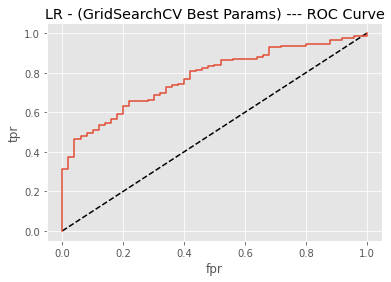

In [298]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('LR - (GridSearchCV Best Params) --- ROC Curve')
plt.show()

<h3>Conclusion</h3>

Accuracies of the various models are as follows

<b>Naive Bayes Classifier Accuracies</b>

In [299]:
print('Accuracy of Multinomial Model:',acr_mult)
print('Accuracy of Bernouli Model:',acr_bern)
print('Accuracy of Gaussian Model:',acr_gaus)

Accuracy of Multinomial Model: 54.285714285714285
Accuracy of Bernouli Model: 71.42857142857143
Accuracy of Gaussian Model: 59.42857142857143


<h7>Amongst the Naive Bayes based Classification models we can conclude that the <b>"Bernouli Model"</b> is best suited in this case as the Accuracy is higher and does not seem to be over fitting</h7>

<b>Logistic Regression Classifier Accuracies</b>

In [237]:
print('Accuracy of Logistic Regression with GridSearchCV:',acr_CV)

Accuracy of Logistic Regression with GridSearchCV: 73.71428571428571


<h7>Hence, we can conclude that <b>Logistic Regression with GridSearchCV</b> has a better accuracy than the <b>Naive Bayes - Bernoulli Model Classifier</b> which has lesser accuracy.</h7>